In [1]:
! pip install experta
# Para compatibilidad con versiones anteriores, siempre utilizarlo.
import collections.abc
if not hasattr(collections, 'Mapping'):
    collections.Mapping = collections.abc.Mapping

# Ejercicio 1 
Sistema experto para diagnóstico de fallas en un vehículo

In [2]:
from experta import Fact, KnowledgeEngine, Rule, AND, NOT # Importa la libreria experta para crear el sistema experto

# Definicion de hechos utilizados en el sistema
class Symptom(Fact):  # Representa un sintoma observado en el vehiculo
    pass

class CarState(Fact):  # Estado general del motor u otra parte del vehiculo
    pass

class Diagnosis(Fact):  # Diagnostico generado por el sistema
    pass

class RepairAction(Fact):  # Representa una accion de reparacion necesaria
    pass

class VehicleStatus(Fact):  # Estado general del proceso de reparacion
    pass

# Clase principal que contiene las reglas del sistema experto
class VehicleDiagnosis(KnowledgeEngine):

    # Regla: humo blanco y luz de aceite indican posible dano grave al motor
    @Rule(AND(Symptom(tipo='humo_blanco'), Symptom(tipo='luz_aceite')), salience=100)
    def motor_grave_dano(self):
        resultado = 'Posible_junta_de_cabeza_mala,_motor_en_riesgo'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))
        self.declare(RepairAction(tipo='reparar_motor'))

    # Regla: ruido metalico indica posible problema en los frenos
    @Rule(Symptom(tipo='ruido_metalico'), salience=50)
    def frenos_problema(self):
        resultado = 'Revisar_sistema_de_frenos'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))
        self.declare(RepairAction(tipo='reparar_frenos'))

    # Complete la regla: fuga de liquido + motor caliente = posible perdida de refrigerante
    @Rule(AND(Symptom(tipo='fuga_liquido'), CarState(estado='motor_caliente')), salience=50)
    def perdida_refrigerante(self):
        resultado = 'Perdida_de_refrigerante,_posible_sobrecalentamiento'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))
        self.declare(RepairAction(tipo='rellenar_refrigerante'))

    # Regla: si no hay sintomas clave, sugerir revision general
    @Rule(NOT(Symptom(tipo='humo_blanco')), NOT(Symptom(tipo='luz_aceite')), NOT(Symptom(tipo='ruido_metalico')), salience=10)
    def revision_general(self):
        resultado = 'Revision_general_recomendada'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))

    # Regla de reparacion: eliminar sintoma 'ruido_metalico'
    @Rule(RepairAction(tipo='reparar_frenos'), Symptom(tipo='ruido_metalico'), salience=150)
    def ejecutar_reparacion_frenos(self):
        print("Reparando sistema de frenos - Eliminando sintoma 'ruido_metalico'")
        for fact in self.facts:
            if isinstance(fact, Symptom) and self.facts[fact]['tipo'] == 'ruido_metalico':
                self.retract(fact)
                break
        print("Sintoma eliminado, vehiculo reparado")
        self.declare(VehicleStatus(estado="verificar_reparacion"))

    # Regla de reparacion: eliminar sintoma 'humo_blanco'
    @Rule(RepairAction(tipo='reparar_motor'), Symptom(tipo='humo_blanco'), salience=150)
    def ejecutar_reparacion_motor_humo(self):
        print("Reparando problema del motor - Eliminando sintoma 'humo_blanco'")
        for fact in self.facts:
            if isinstance(fact, Symptom) and self.facts[fact]['tipo'] == 'humo_blanco':
                self.retract(fact)
                break
        self.declare(CarState(estado='en_reparacion'))
        print("Sintoma de humo eliminado, motor en reparacion")
        self.declare(VehicleStatus(estado="verificar_reparacion"))

    # Regla de reparacion: eliminar sintoma 'luz_aceite'
    @Rule(RepairAction(tipo='reparar_motor'), Symptom(tipo='luz_aceite'), salience=150)
    def ejecutar_reparacion_motor_aceite(self):
        print("Reparando problema del motor - Eliminando sintoma 'luz_aceite'")
        for fact in self.facts:
            if isinstance(fact, Symptom) and self.facts[fact]['tipo'] == 'luz_aceite':
                self.retract(fact)
                break
        print("Sintoma de luz de aceite eliminado")
        self.declare(VehicleStatus(estado="verificar_reparacion"))

    # Verifica si ya no quedan sintomas: vehiculo esta listo
    @Rule(VehicleStatus(estado="verificar_reparacion"), salience=5)
    def vehiculo_reparado(self):
        tiene_sintomas = False
        for fact in self.facts:
            if isinstance(fact, Symptom):
                tiene_sintomas = True
                break

        if not tiene_sintomas:
            print("Todos los sintomas han sido resueltos. Vehiculo listo.")

# Ejecucion del sistema experto
if __name__ == "__main__":
    engine = VehicleDiagnosis()
    engine.reset()  # Reinicia el motor

    print("Primera ejecucion - Diagnostico inicial")
    # Complete las declaraciones
    engine.declare(Symptom(tipo='humo_blanco'))
    engine.declare(Symptom(tipo='luz_aceite'))
    engine.declare(Symptom(tipo='ruido_metalico'))

    engine.run()  # Ejecuta las reglas

Primera ejecucion - Diagnostico inicial
Posible_junta_de_cabeza_mala,_motor_en_riesgo
Reparando problema del motor - Eliminando sintoma 'luz_aceite'
Sintoma de luz de aceite eliminado
Reparando problema del motor - Eliminando sintoma 'humo_blanco'
Sintoma de humo eliminado, motor en reparacion
Revisar_sistema_de_frenos
Reparando sistema de frenos - Eliminando sintoma 'ruido_metalico'
Sintoma eliminado, vehiculo reparado
Todos los sintomas han sido resueltos. Vehiculo listo.


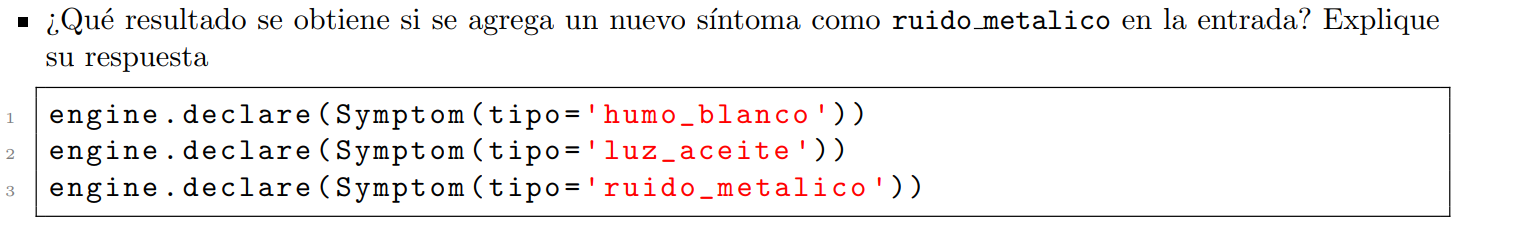

## Resultado de la ejecución
Primera ejecucion - Diagnostico inicial
Posible_junta_de_cabeza_mala,_motor_en_riesgo
Reparando problema del motor - Eliminando sintoma 'luz_aceite'
Sintoma de luz de aceite eliminado
Reparando problema del motor - Eliminando sintoma 'humo_blanco'
Sintoma de humo eliminado, motor en reparacion
Revisar_sistema_de_frenos
Reparando sistema de frenos - Eliminando sintoma 'ruido_metalico'
Sintoma eliminado, vehiculo reparado
Todos los sintomas han sido resueltos. Vehiculo listo.

### Análisis del Orden de Ejecución

Aunque la última línea declarada fue:
```python
engine.declare(Symptom(tipo='ruido_metalico'))
```
la primera regla ejecutada fue la que diagnostica daño grave al motor debido a su `salience=100`, la cual tiene prioridad sobre las otras.

Esta regla declara:
```python
self.declare(RepairAction(tipo='reparar_motor'))
```
y como el último síntoma declarado relevante fue `'luz_aceite'`, se ejecuta la reparación de ese síntoma primero.

Después se elimina `'humo_blanco'`, y luego se ejecuta la regla de `ruido_metalico` que tiene menor prioridad (`salience=50`). Finalmente, cuando todos los síntomas han sido eliminados, se dispara la regla con `salience=5` que indica que el vehículo está listo.

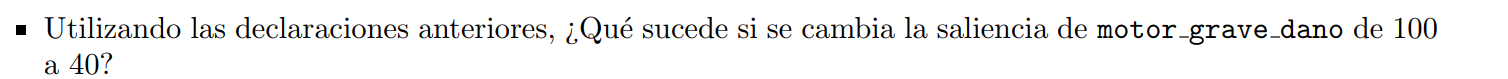

ejecutaria primero `ruido_metalico ` ya que tendría salience = 50
y luego ejecutaria la regla de 
 `Regla: humo blanco y luz de aceite indican posible dano grave al motor`


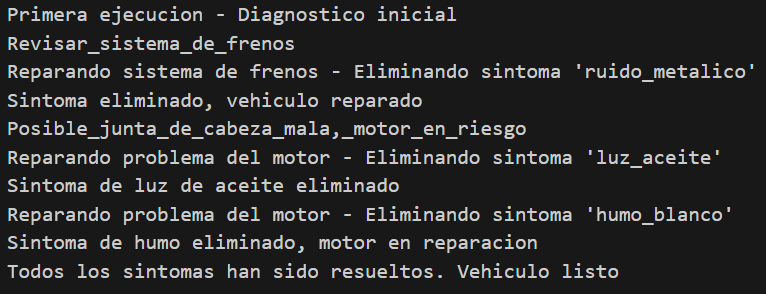

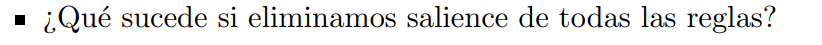

Se ejecutara de manera LIFO (Last In, First Out)  la última declaración de hechos se activa primero 

In [3]:
from experta import Fact, KnowledgeEngine, Rule, AND, NOT # Importa la libreria experta para crear el sistema experto

# Definicion de hechos utilizados en el sistema
class Symptom(Fact):  # Representa un sintoma observado en el vehiculo
    pass

class CarState(Fact):  # Estado general del motor u otra parte del vehiculo
    pass

class Diagnosis(Fact):  # Diagnostico generado por el sistema
    pass

class RepairAction(Fact):  # Representa una accion de reparacion necesaria
    pass

class VehicleStatus(Fact):  # Estado general del proceso de reparacion
    pass

# Clase principal que contiene las reglas del sistema experto
class VehicleDiagnosis(KnowledgeEngine):

    # Regla: humo blanco y luz de aceite indican posible dano grave al motor
    @Rule(AND(Symptom(tipo='humo_blanco'), Symptom(tipo='luz_aceite')))
    def motor_grave_dano(self):
        resultado = 'Posible_junta_de_cabeza_mala,_motor_en_riesgo'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))
        self.declare(RepairAction(tipo='reparar_motor'))

    # Regla: ruido metalico indica posible problema en los frenos
    @Rule(Symptom(tipo='ruido_metalico'), salience=50)
    def frenos_problema(self):
        resultado = 'Revisar_sistema_de_frenos'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))
        self.declare(RepairAction(tipo='reparar_frenos'))

    # Complete la regla: fuga de liquido + motor caliente = posible perdida de refrigerante
    @Rule(AND(Symptom(tipo='fuga_liquido'), CarState(estado='motor_caliente')))
    def perdida_refrigerante(self):
        resultado = 'Perdida_de_refrigerante,_posible_sobrecalentamiento'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))
        self.declare(RepairAction(tipo='rellenar_refrigerante'))

    # Regla: si no hay sintomas clave, sugerir revision general
    @Rule(NOT(Symptom(tipo='humo_blanco')), NOT(Symptom(tipo='luz_aceite')), NOT(Symptom(tipo='ruido_metalico')))
    def revision_general(self):
        resultado = 'Revision_general_recomendada'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))

    # Regla de reparacion: eliminar sintoma 'ruido_metalico'
    @Rule(RepairAction(tipo='reparar_frenos'), Symptom(tipo='ruido_metalico'))
    def ejecutar_reparacion_frenos(self):
        print("Reparando sistema de frenos - Eliminando sintoma 'ruido_metalico'")
        for fact in self.facts:
            if isinstance(fact, Symptom) and self.facts[fact]['tipo'] == 'ruido_metalico':
                self.retract(fact)
                break
        print("Sintoma eliminado, vehiculo reparado")
        self.declare(VehicleStatus(estado="verificar_reparacion"))

    # Regla de reparacion: eliminar sintoma 'humo_blanco'
    @Rule(RepairAction(tipo='reparar_motor'), Symptom(tipo='humo_blanco'))
    def ejecutar_reparacion_motor_humo(self):
        print("Reparando problema del motor - Eliminando sintoma 'humo_blanco'")
        for fact in self.facts:
            if isinstance(fact, Symptom) and self.facts[fact]['tipo'] == 'humo_blanco':
                self.retract(fact)
                break
        self.declare(CarState(estado='en_reparacion'))
        print("Sintoma de humo eliminado, motor en reparacion")
        self.declare(VehicleStatus(estado="verificar_reparacion"))

    # Regla de reparacion: eliminar sintoma 'luz_aceite'
    @Rule(RepairAction(tipo='reparar_motor'), Symptom(tipo='luz_aceite'))
    def ejecutar_reparacion_motor_aceite(self):
        print("Reparando problema del motor - Eliminando sintoma 'luz_aceite'")
        for fact in self.facts:
            if isinstance(fact, Symptom) and self.facts[fact]['tipo'] == 'luz_aceite':
                self.retract(fact)
                break
        print("Sintoma de luz de aceite eliminado")
        self.declare(VehicleStatus(estado="verificar_reparacion"))

    # Verifica si ya no quedan sintomas: vehiculo esta listo
    @Rule(VehicleStatus(estado="verificar_reparacion"))
    def vehiculo_reparado(self):
        tiene_sintomas = False
        for fact in self.facts:
            if isinstance(fact, Symptom):
                tiene_sintomas = True
                break

        if not tiene_sintomas:
            print("Todos los sintomas han sido resueltos. Vehiculo listo.")

# Ejecucion del sistema experto
if __name__ == "__main__":
    engine = VehicleDiagnosis()
    engine.reset()  # Reinicia el motor

    print("Primera ejecucion - Diagnostico inicial")
    # Complete las declaraciones
    engine.declare(Symptom(tipo='humo_blanco'))
    engine.declare(Symptom(tipo='luz_aceite'))
    engine.declare(Symptom(tipo='ruido_metalico'))

    engine.run()  # Ejecuta las reglas

Primera ejecucion - Diagnostico inicial
Revisar_sistema_de_frenos
Reparando sistema de frenos - Eliminando sintoma 'ruido_metalico'
Sintoma eliminado, vehiculo reparado
Todos los sintomas han sido resueltos. Vehiculo listo.
Posible_junta_de_cabeza_mala,_motor_en_riesgo
Reparando problema del motor - Eliminando sintoma 'luz_aceite'
Sintoma de luz de aceite eliminado
Reparando problema del motor - Eliminando sintoma 'humo_blanco'
Sintoma de humo eliminado, motor en reparacion


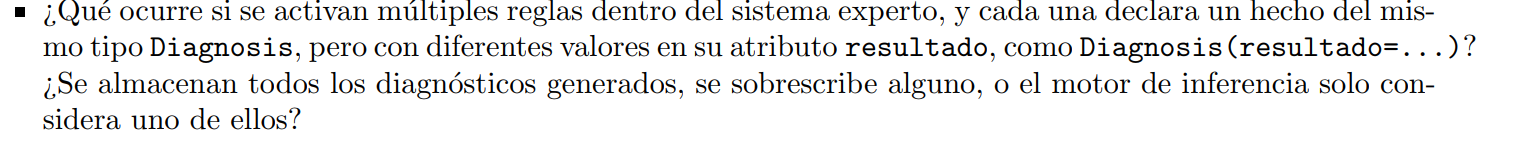

Sí, se almacenan todos los diagnósticos generados.
El motor de inferencia no sobrescribe los hechos declarados previamente, incluso si son del mismo tipo (Diagnosis) pero tienen atributos diferentes.

cada hecho declarado es una instancia única en la memoria del motor, y se pueden tener múltiples hechos del mismo tipo con distintos valores coexistiendo.

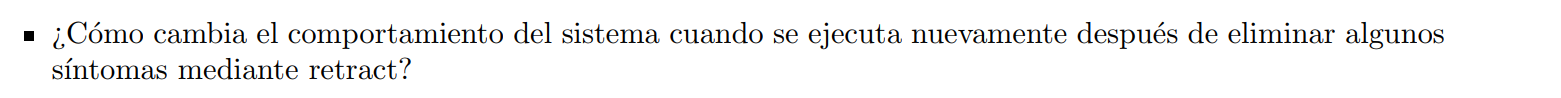

Cuando se eliminan síntomas (por ejemplo, Symptom(tipo='ruido_metalico')) con retract(), se modifica la base de hechos, por lo tanto:

Las reglas que dependían de ese síntoma ya no podrán activarse.

Otras reglas que sí aplican con los hechos restantes, sí pueden ejecutarse.

Si se elimina todos los síntomas relevantes, podrían activarse reglas más generales como la de revisión general.

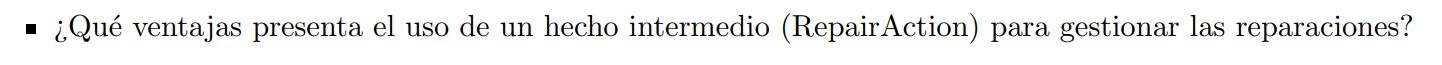

Este RepairAction no lo declara el usuario, sino que lo declara una regla de diagnóstico, y luego lo utilizan otras reglas para ejecutar reparaciones.

permite separar claramente el diagnóstico de la reparación, facilitando un diseño modular y mantenible. Además, mejora el encadenamiento de reglas al permitir que una acción de reparación se active solo cuando hay un diagnóstico previo, evita la redundancia en las condiciones de las reglas, simplifica la lógica del sistema y permite mayor flexibilidad y trazabilidad en el proceso de toma de decisiones.

# Ejercicio 2
Arboles Genealógicos

In [5]:
from experta import Fact, KnowledgeEngine, MATCH

# === Definición de hechos base ===
class Hombre(Fact):
    """Representa a un hombre en la familia"""
    pass

class Mujer(Fact):
    """Representa a una mujer en la familia"""
    pass

class Padre(Fact):
    """Relación de paternidad"""
    pass

class Madre(Fact):
    """Relación de maternidad"""
    pass

# === Hechos derivados por inferencia ===
class Progenitor(Fact):
    """Padre o madre"""
    pass

class Abuelo(Fact):
    """Abuelo de alguien"""
    pass

class Abuela(Fact):
    """Abuela de alguien"""
    pass

class Hermano(Fact):
    """Relación entre hermanos hombres"""
    pass

class Hermana(Fact):
    """Relación entre hermanas mujeres"""
    pass

class Tio(Fact):
    """Relación de tío con sobrino"""
    pass

class Tia(Fact):
    """Relación de tía con sobrino"""
    pass

class Primo(Fact):
    """Relación entre primos"""
    pass

# === Motor de inferencia basado en reglas ===
class ArbolGenealogico(KnowledgeEngine):

    def __init__(self):
        super().__init__()
        # Conjunto para llevar control de relaciones procesadas
        self.relaciones_procesadas = set()

    # === REGLAS DE INFERENCIA COMPLETAS (EJEMPLOS) ===

    @Rule(Padre(padre=MATCH.padre, hijo=MATCH.hijo), salience=100)
    def padre_a_progenitor(self, padre, hijo):
        self.declare(Progenitor(progenitor=padre, hijo=hijo))
        print(f"Progenitor: {padre} es progenitor de {hijo}")

    @Rule(Madre(madre=MATCH.madre, hijo=MATCH.hijo), salience=100)
    def madre_a_progenitor(self, madre, hijo):
        self.declare(Progenitor(progenitor=madre, hijo=hijo))
        print(f"Progenitor: {madre} es progenitor de {hijo}")

    # === REGLAS CON ESPACIOS PARA COMPLETAR ===

    @Rule(Progenitor(progenitor=MATCH.progenitor, hijo=MATCH.hijo),
          Progenitor(progenitor=MATCH.hijo, hijo=MATCH.nieto),
          Hombre(nombre=MATCH.progenitor), salience=80)
    def inferir_abuelo(self, progenitor, nieto):
        self.declare(Abuelo(abuelo=progenitor, nieto=nieto))
        print(f"Abuelo: {progenitor} es abuelo de {nieto}")

    @Rule(Progenitor(progenitor=MATCH.progenitor, hijo=MATCH.hijo),
          Progenitor(progenitor=MATCH.hijo, hijo=MATCH.nieto),
          Mujer(nombre=MATCH.progenitor), salience=80)
    def inferir_abuela(self, progenitor, nieto):
        self.declare(Abuela(abuela=progenitor, nieto=nieto))
        print(f"Abuela: {progenitor} es abuela de {nieto}")

    @Rule(Progenitor(progenitor=MATCH.progenitor, hijo=MATCH.hijo1),
          Progenitor(progenitor=MATCH.progenitor, hijo=MATCH.hijo2),
          Hombre(nombre=MATCH.hijo1), salience=60)
    def inferir_hermano(self, progenitor, hijo1, hijo2):
        if hijo1 == hijo2:
            return
        relacion_id = f"hermano_{hijo1}_{hijo2}"
        if relacion_id in self.relaciones_procesadas:
            return
        self.relaciones_procesadas.add(relacion_id)
        self.declare(Hermano(hermano=hijo1, hermano_de=hijo2))
        print(f"Hermano: {hijo1} es hermano de {hijo2}")

    @Rule(Progenitor(progenitor=MATCH.progenitor, hijo=MATCH.hijo1),
          Progenitor(progenitor=MATCH.progenitor, hijo=MATCH.hijo2),
          Mujer(nombre=MATCH.hijo1), salience=60)
    def inferir_hermana(self, progenitor, hijo1, hijo2):
        if hijo1 == hijo2:
            return
        relacion_id = f"hermana_{hijo1}_{hijo2}"
        if relacion_id in self.relaciones_procesadas:
            return
        self.relaciones_procesadas.add(relacion_id)
        self.declare(Hermana(hermana=hijo1, hermana_de=hijo2))
        print(f"Hermana: {hijo1} es hermana de {hijo2}")

    @Rule(Hermano(hermano=MATCH.hermano, hermano_de=MATCH.progenitor),
          Progenitor(progenitor=MATCH.progenitor, hijo=MATCH.sobrino), salience=40)
    def inferir_tio(self, hermano, sobrino):
        self.declare(Tio(tio=hermano, sobrino=sobrino))
        print(f"Tío: {hermano} es tío de {sobrino}")

    @Rule(Hermana(hermana=MATCH.hermana, hermana_de=MATCH.progenitor),
          Progenitor(progenitor=MATCH.progenitor, hijo=MATCH.sobrino), salience=40)
    def inferir_tia(self, hermana, sobrino):
        self.declare(Tia(tia=hermana, sobrino=sobrino))
        print(f"Tía: {hermana} es tía de {sobrino}")

    @Rule(Tio(tio=MATCH.tio, sobrino=MATCH.primo1),
          Progenitor(progenitor=MATCH.tio, hijo=MATCH.primo2), salience=20)
    def inferir_primos_por_tio(self, tio, primo1, primo2):
        if primo1 == primo2:
            return
        if primo1 < primo2:
            relacion_id = f"primos_{primo1}_{primo2}"
        else:
            relacion_id = f"primos_{primo2}_{primo1}"
        if relacion_id in self.relaciones_procesadas:
            return
        self.relaciones_procesadas.add(relacion_id)
        self.declare(Primo(primo=primo1, primo_de=primo2))
        self.declare(Primo(primo=primo2, primo_de=primo1))
        print(f"Primos: {primo1} y {primo2} son primos")

    @Rule(Tia(tia=MATCH.tia, sobrino=MATCH.primo1),
          Progenitor(progenitor=MATCH.tia, hijo=MATCH.primo2), salience=20)
    def inferir_primos_por_tia(self, tia, primo1, primo2):
        if primo1 == primo2:
            return
        if primo1 < primo2:
            relacion_id = f"primos_{primo1}_{primo2}"
        else:
            relacion_id = f"primos_{primo2}_{primo1}"
        if relacion_id in self.relaciones_procesadas:
            return
        self.relaciones_procesadas.add(relacion_id)
        self.declare(Primo(primo=primo1, primo_de=primo2))
        self.declare(Primo(primo=primo2, primo_de=primo1))
        print(f"Primos: {primo1} y {primo2} son primos")


#uso

motor = ArbolGenealogico()
motor.reset()

# Declarar hechos base
motor.declare(Hombre(nombre='juan'))
motor.declare(Hombre(nombre='pedro'))
motor.declare(Hombre(nombre='carlos'))
motor.declare(Hombre(nombre='david'))
motor.declare(Hombre(nombre='luis'))

motor.declare(Mujer(nombre='maria'))
motor.declare(Mujer(nombre='ana'))
motor.declare(Mujer(nombre='sofia'))
motor.declare(Mujer(nombre='laura'))
motor.declare(Mujer(nombre='carmen'))

motor.declare(Padre(padre='juan', hijo='pedro'))
motor.declare(Padre(padre='juan', hijo='ana'))
motor.declare(Padre(padre='pedro', hijo='david'))
motor.declare(Padre(padre='pedro', hijo='sofia'))
motor.declare(Padre(padre='carlos', hijo='luis'))
motor.declare(Padre(padre='carlos', hijo='laura'))

motor.declare(Madre(madre='maria', hijo='pedro'))
motor.declare(Madre(madre='maria', hijo='ana'))
motor.declare(Madre(madre='laura', hijo='david'))
motor.declare(Madre(madre='laura', hijo='sofia'))
motor.declare(Madre(madre='carmen', hijo='luis'))
motor.declare(Madre(madre='carmen', hijo='laura'))

motor.run()

Progenitor: carmen es progenitor de laura
Progenitor: carmen es progenitor de luis
Progenitor: laura es progenitor de sofia
Progenitor: laura es progenitor de david
Progenitor: maria es progenitor de ana
Progenitor: maria es progenitor de pedro
Progenitor: carlos es progenitor de laura
Progenitor: carlos es progenitor de luis
Progenitor: pedro es progenitor de sofia
Progenitor: pedro es progenitor de david
Progenitor: juan es progenitor de ana
Progenitor: juan es progenitor de pedro
Abuelo: juan es abuelo de david
Abuelo: juan es abuelo de sofia
Abuela: maria es abuela de david
Abuela: maria es abuela de sofia
Abuelo: carlos es abuelo de david
Abuelo: carlos es abuelo de sofia
Abuela: carmen es abuela de david
Abuela: carmen es abuela de sofia
Hermana: ana es hermana de pedro
Hermano: pedro es hermano de ana
Hermana: sofia es hermana de david
Hermano: david es hermano de sofia
Hermana: laura es hermana de luis
Hermano: luis es hermano de laura
Tío: luis es tío de david
Tío: luis es tío

Explicacion de **MATCH**

si declaramos el hecho:
```python
Padre(padre='Carlos', hijo='Juan')
```

Y tenemos esta regla:
```python
@Rule(Padre(padre=MATCH.padre, hijo=MATCH.hijo))
def padre_a_progenitor(self, padre, hijo):
    print(f"{padre} es progenitor de {hijo}")
```

Aquí MATCH.padre y MATCH.hijo dicen:

“Cuando encuentres un hecho Padre, extrae el valor del campo padre y guárdalo en la variable padre, y haz lo mismo con hijo”.

Entonces, cuando se ejecuta la regla, padre será 'Carlos' y hijo será 'Juan'.

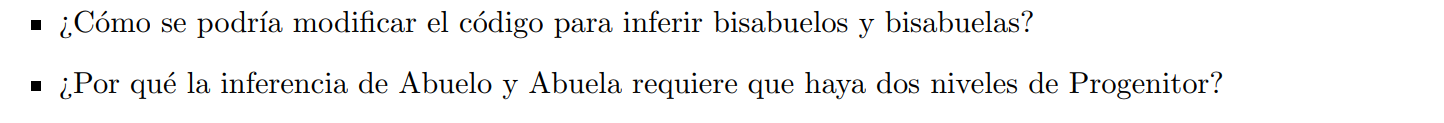

- 1

Para implementar la inferencia de bisabuelos, primero debemos crear las clases de hechos correspondientes:
```python
class Bisabuelo(Fact):
    """Bisabuelo de alguien"""
    pass

class Bisabuela(Fact):
    """Bisabuela de alguien"""
    pass
```
Luego, debemos agregar las reglas de inferencia que encadenen tres niveles de Progenitor:

```python
@Rule(Progenitor(progenitor=MATCH.progenitor, hijo=MATCH.hijo),
      Progenitor(progenitor=MATCH.hijo, hijo=MATCH.nieto),
      Progenitor(progenitor=MATCH.nieto, hijo=MATCH.bisnieto),
      Hombre(nombre=MATCH.progenitor), salience=70)
def inferir_bisabuelo(self, progenitor, bisnieto):
    self.declare(Bisabuelo(bisabuelo=progenitor, bisnieto=bisnieto))
    print(f"Bisabuelo: {progenitor} es bisabuelo de {bisnieto}")

@Rule(Progenitor(progenitor=MATCH.progenitor, hijo=MATCH.hijo),
      Progenitor(progenitor=MATCH.hijo, hijo=MATCH.nieto),
      Progenitor(progenitor=MATCH.nieto, hijo=MATCH.bisnieto),
      Mujer(nombre=MATCH.progenitor), salience=70)
def inferir_bisabuela(self, progenitor, bisnieto):
    self.declare(Bisabuela(bisabuela=progenitor, bisnieto=bisnieto))
    print(f"Bisabuela: {progenitor} es bisabuela de {bisnieto}")

- 2
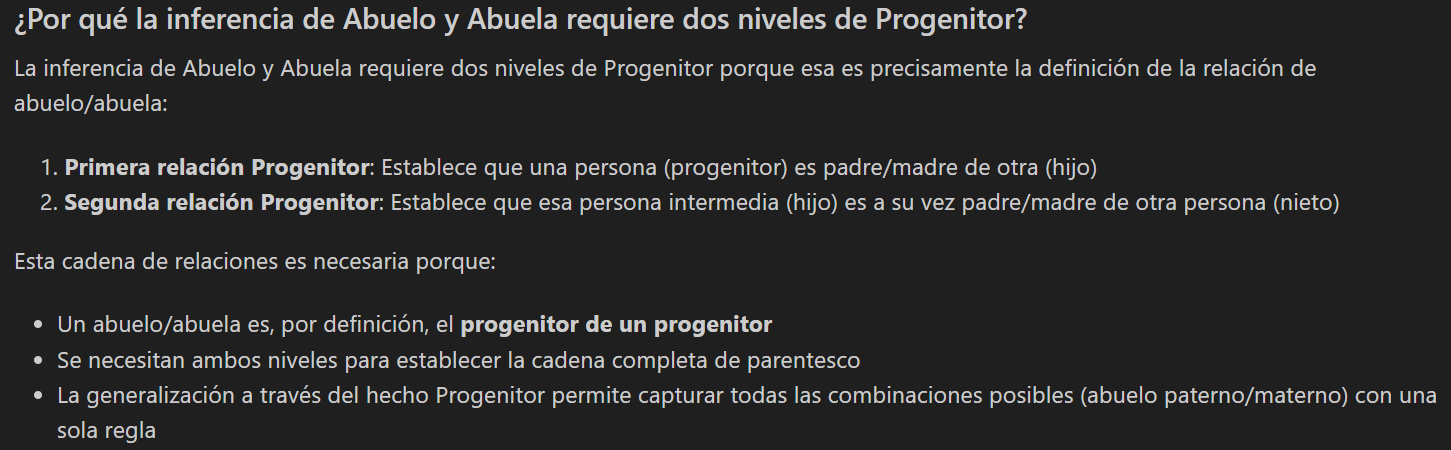

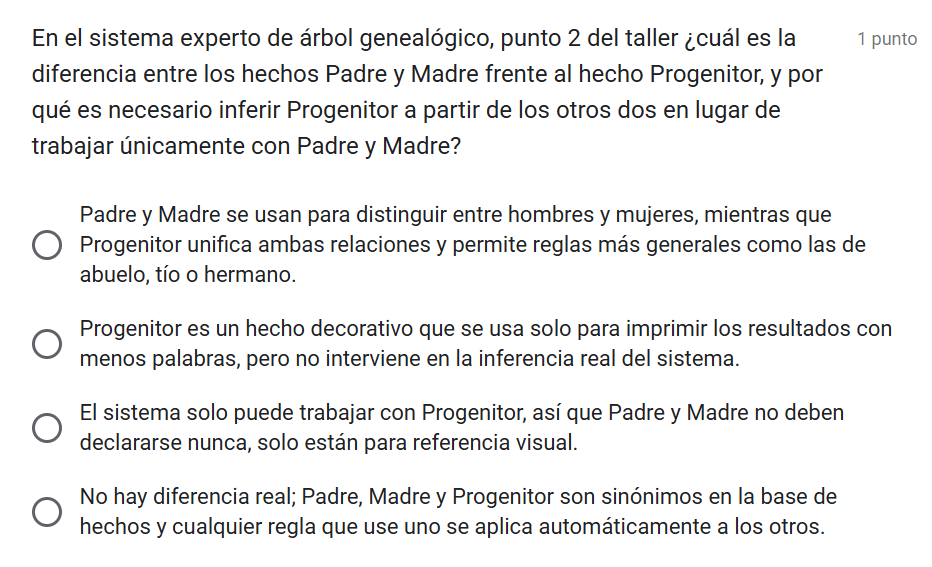

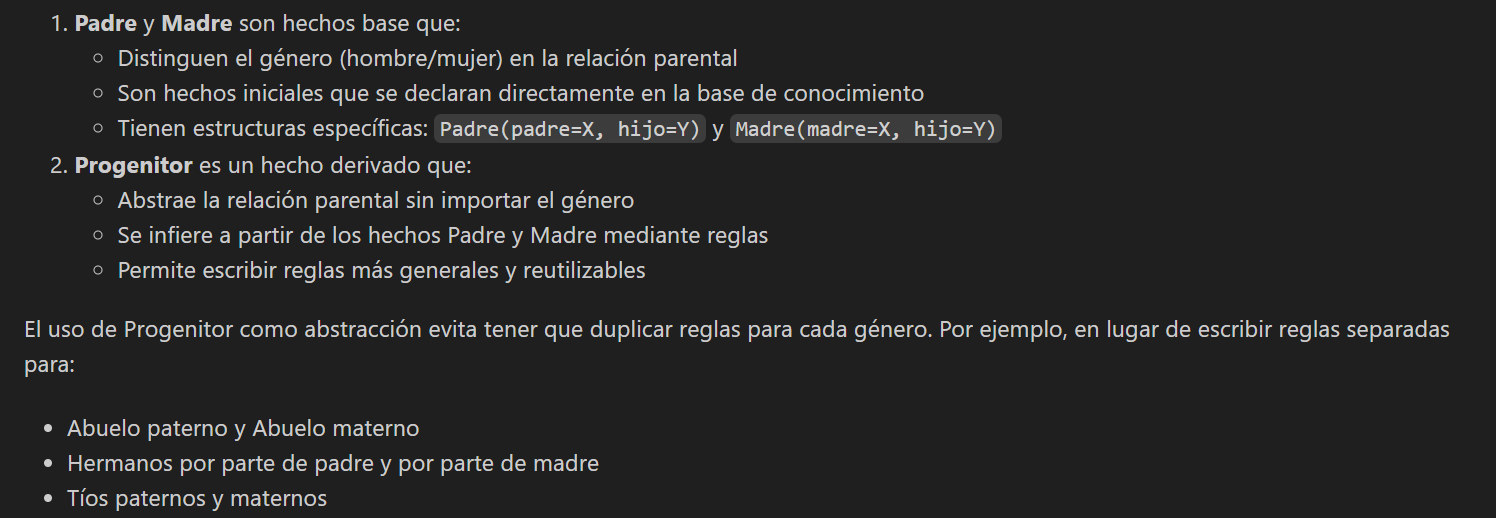

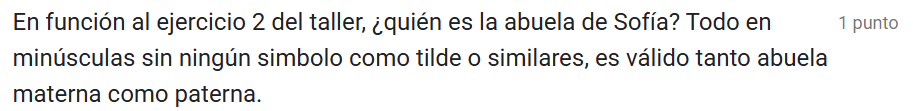

- juan

- carlos

# Ejercicio 3

Experto de Diagnóstico Médico

In [ ]:
from experta import Fact


# Definimos hechos

class Sintoma(Fact):
    # Completar

class # Completar (# Completar):
    # Completa

class Gravedad(# Completa):
    # Completa

class Diagnostico(# Completa):
    # Completa

class Recomendacion(Fact):
    # Completa



class DiagnosticoMedico(# Completa):

    @Rule(Enfermedad(nombre='resfriado_comun', sintomas=# Completar) &
          Fact(sintomas_paciente=MATCH.sintomas_paciente))
    # Completa


    @Rule(Enfermedad(nombre='# Completar, sintomas=MATCH.sintomas) &
          Fact(sintomas_paciente=MATCH.sintomas_paciente))
    # Completa


    @Rule(Enfermedad(nombre='covid_19', sintomas=MATCH.sintomas) &
          Fact(sintomas_paciente=MATCH.sintomas_paciente))
    # Completa


    @Rule(Enfermedad(nombre='neumonia', sintomas=MATCH.sintomas) &
          Fact(sintomas_paciente=MATCH.sintomas_paciente))
    # Completa

    # Recomendaciones básicas según gravedad
    @Rule(Diagnostico(# Completa) &
          Gravedad(enfermedad=MATCH.enf, nivel=1))
    # Completa

    @Rule(Diagnostico(enfermedad=MATCH.enf) &
          Gravedad(enfermedad=MATCH.enf, # Completar))
    # Completa

    @Rule(Diagnostico(# Completa) &
          Gravedad(enfermedad=MATCH.enf, nivel=3))
    # Completa

# =========================
# Base de conocimiento
# =========================

enfermedades = [
    Enfermedad(nombre='resfriado_comun', sintomas=['tos', 'congestion_nasal', 'estornudos', 'dolor_garganta']),
    Enfermedad(nombre='gripe', sintomas=['fiebre', 'tos', 'dolor_muscular', 'fatiga', 'dolor_cabeza']),
    Enfermedad(nombre='covid_19', sintomas=['fiebre', 'tos', 'fatiga', 'dificultad_respirar', 'dolor_muscular']),
    Enfermedad(nombre='neumonia', sintomas=['tos', 'fiebre', 'dificultad_respirar', 'dolor_pecho', 'fatiga']),
]

gravedades = [
    Gravedad(enfermedad='resfriado_comun', nivel=1),
    Gravedad(enfermedad='gripe', nivel=2),
    Gravedad(enfermedad='covid_19', nivel=3),
    Gravedad(enfermedad='neumonia', nivel=3),
]

# =========================
# Ejecución
# =========================

if __name__ == '__main__':
    motor = DiagnosticoMedico()
    motor.reset()

    for enf in enfermedades:
        motor.declare(enf)

    for grav in gravedades:
        motor.declare(grav)

    sintomas_conocidos = ['fiebre', 'tos', 'dolor_cabeza', 'dolor_garganta', 'congestion_nasal','fatiga', 'dolor_muscular', 'estornudos', 'dificultad_respirar', 'dolor_pecho']

    sintomas_paciente = []
    print("🩺 Diagnóstico Médico Básico")
    print("Responde 'si' o 'no' a cada síntoma:")

    for sintoma in sintomas_conocidos:
        respuesta = input(f"¿Tienes {sintoma.replace('_', ' ')}? (si/no): ").strip().lower()
        if respuesta == 'si':
            sintomas_paciente.append(sintoma)

    motor.declare(# Completa(sintomas_paciente=sintomas_paciente))

    # Ejecutamos el motor
    motor.run()

    # Mostramos resultado
    diagnostico_final = None
    recomendacion_final = None

    for hecho in motor.facts.values():
        if isinstance(# Completar, # Completar):
            diagnostico_final = hecho['enfermedad']
        elif isinstance(# Completar, # Completar):
            recomendacion_final = hecho['mensaje']

    if diagnostico_final:
        print(f"\n✅ Diagnóstico: {diagnostico_final}")
        print(f"💡 Recomendación: {recomendacion_final}")
    else:
        print("\n❓ No se pudo hacer un diagnóstico claro. Por favor consulta al médico.")


# Solución

In [2]:
from experta import Fact, KnowledgeEngine, Rule, MATCH

# Definimos hechos

class Sintoma(Fact):
    """Hecho para síntomas individuales"""
    pass

class Enfermedad(Fact):
    """Hecho para enfermedades y sus síntomas"""
    nombre = ""
    sintomas = []

class Gravedad(Fact):
    """Hecho para nivel de gravedad de una enfermedad"""
    enfermedad = ""
    nivel = 0

class Diagnostico(Fact):
    """Hecho para diagnóstico de enfermedad"""
    enfermedad = ""

class Recomendacion(Fact):
    """Hecho para recomendaciones médicas"""
    enfermedad = ""
    mensaje = ""

class DiagnosticoMedico(KnowledgeEngine):

    # Evaluar resfriado común
    @Rule(Enfermedad(nombre='resfriado_comun', sintomas=MATCH.sintomas_enf),
          Fact(sintomas_paciente=MATCH.sintomas_paciente))
    def evaluar_resfriado(self, sintomas_enf, sintomas_paciente):
        coincidencias = len(set(sintomas_enf) & set(sintomas_paciente))
        if coincidencias >= len(sintomas_enf) / 2:
            self.declare(Diagnostico(enfermedad='resfriado_comun'))

    # Evaluar gripe
    @Rule(Enfermedad(nombre='gripe', sintomas=MATCH.sintomas_enf),
          Fact(sintomas_paciente=MATCH.sintomas_paciente))
    def evaluar_gripe(self, sintomas_enf, sintomas_paciente):
        coincidencias = len(set(sintomas_enf) & set(sintomas_paciente))
        if coincidencias >= len(sintomas_enf) / 2:
            self.declare(Diagnostico(enfermedad='gripe'))

    # Evaluar covid_19
    @Rule(Enfermedad(nombre='covid_19', sintomas=MATCH.sintomas_enf),
          Fact(sintomas_paciente=MATCH.sintomas_paciente))
    def evaluar_covid(self, sintomas_enf, sintomas_paciente):
        coincidencias = len(set(sintomas_enf) & set(sintomas_paciente))
        if coincidencias >= len(sintomas_enf) / 2:
            self.declare(Diagnostico(enfermedad='covid_19'))

    # Evaluar neumonía
    @Rule(Enfermedad(nombre='neumonia', sintomas=MATCH.sintomas_enf),
          Fact(sintomas_paciente=MATCH.sintomas_paciente))
    def evaluar_neumonia(self, sintomas_enf, sintomas_paciente):
        coincidencias = len(set(sintomas_enf) & set(sintomas_paciente))
        if coincidencias >= len(sintomas_enf) / 2:
            self.declare(Diagnostico(enfermedad='neumonia'))

    # Recomendaciones básicas según gravedad
    @Rule(Diagnostico(enfermedad=MATCH.enf),
          Gravedad(enfermedad=MATCH.enf, nivel=1))
    def recomendar_leve(self, enf):
        self.declare(Recomendacion(enfermedad=enf, mensaje="Descansa en casa, mantente hidratado y monitorea tus síntomas."))

    @Rule(Diagnostico(enfermedad=MATCH.enf),
          Gravedad(enfermedad=MATCH.enf, nivel=2))
    def recomendar_moderada(self, enf):
        self.declare(Recomendacion(enfermedad=enf, mensaje="Consulta al médico para una evaluación y tratamiento adecuado."))

    @Rule(Diagnostico(enfermedad=MATCH.enf),
          Gravedad(enfermedad=MATCH.enf, nivel=3))
    def recomendar_grave(self, enf):
        self.declare(Recomendacion(enfermedad=enf, mensaje="Busca atención médica urgente."))

# =========================
# Base de conocimiento
# =========================

enfermedades = [
    Enfermedad(nombre='resfriado_comun', sintomas=['tos', 'congestion_nasal', 'estornudos', 'dolor_garganta']),
    Enfermedad(nombre='gripe', sintomas=['fiebre', 'tos', 'dolor_muscular', 'fatiga', 'dolor_cabeza']),
    Enfermedad(nombre='covid_19', sintomas=['fiebre', 'tos', 'fatiga', 'dificultad_respirar', 'dolor_muscular']),
    Enfermedad(nombre='neumonia', sintomas=['tos', 'fiebre', 'dificultad_respirar', 'dolor_pecho', 'fatiga']),
]

gravedades = [
    Gravedad(enfermedad='resfriado_comun', nivel=1),
    Gravedad(enfermedad='gripe', nivel=2),
    Gravedad(enfermedad='covid_19', nivel=3),
    Gravedad(enfermedad='neumonia', nivel=3),
]

# =========================
# Ejecución
# =========================

if __name__ == '__main__':
    motor = DiagnosticoMedico()
    motor.reset()

    for enf in enfermedades:
        motor.declare(enf)

    for grav in gravedades:
        motor.declare(grav)

    sintomas_conocidos = ['fiebre', 'tos', 'dolor_cabeza', 'dolor_garganta', 'congestion_nasal','fatiga', 'dolor_muscular', 'estornudos', 'dificultad_respirar', 'dolor_pecho']

    sintomas_paciente = []
    print("🩺 Diagnóstico Médico Básico")
    print("Responde 'si' o 'no' a cada síntoma:")

    for sintoma in sintomas_conocidos:
        respuesta = input(f"¿Tienes {sintoma.replace('_', ' ')}? (si/no): ").strip().lower()
        if respuesta == 'si':
            sintomas_paciente.append(sintoma)

    motor.declare(Fact(sintomas_paciente=sintomas_paciente))

    # Ejecutamos el motor
    motor.run()

    # Mostramos resultado
    diagnostico_final = None
    recomendacion_final = None

    for hecho in motor.facts.values():
        if isinstance(hecho, Diagnostico):
            diagnostico_final = hecho['enfermedad']
        elif isinstance(hecho, Recomendacion):
            recomendacion_final = hecho['mensaje']

    if diagnostico_final:
        print(f"\n✅ Diagnóstico: {diagnostico_final}")
        print(f"💡 Recomendación: {recomendacion_final}")
    else:
        print("\n❓ No se pudo hacer un diagnóstico claro. Por favor consulta al médico.")

🩺 Diagnóstico Médico Básico
Responde 'si' o 'no' a cada síntoma:

✅ Diagnóstico: resfriado_comun
💡 Recomendación: Descansa en casa, mantente hidratado y monitorea tus síntomas.
